In [21]:
from deep_fields.models.random_fields.mcmc_preprocessing import estimate_mcmc_dataloader_and_parameters_mertonjump
from deep_fields.models.random_fields.mcmc_preprocessing import preprocess_cryptoportfolio_for_mertonjump
from deep_fields.data.crypto.dataloaders import CryptoDataLoader
from deep_fields import data_path
from datetime import datetime
import torch
import os

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline 

Current Coin 1 ethereum
Current Coin 2 tether
Current Coin 3 binancecoin


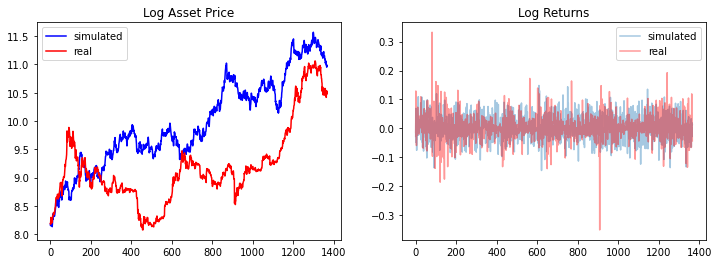

Sigma
tensor(0.0076)


In [5]:
date_string = "2021-06-14"
crypto_folder = os.path.join(data_path, "raw", "crypto")
data_folder = os.path.join(crypto_folder, date_string)

kwargs = {"path_to_data":data_folder,
          "batch_size": 29,
          "steps_ahead":14,
          "date_string": date_string,
          "clean":"interpol",
          "span":"full"}

date0 = datetime(2018, 1, 1)
datef = datetime(2019, 1, 1)

crypto_data_loader = CryptoDataLoader('cpu', **kwargs)
crypto_data_loader.set_portfolio_assets("2021-06-14",
                                        "full",
                                        predictor=None,
                                        top=4,
                                        date0=None,
                                        datef=None,
                                        max_size=4)

data_batch = next(crypto_data_loader.train.__iter__())
corrected_prices_data = preprocess_cryptoportfolio_for_mertonjump(crypto_data_loader)
kwargs,data_loader = estimate_mcmc_dataloader_and_parameters_mertonjump(corrected_prices_data)

In [8]:
log_returns = data_loader["log_returns"]

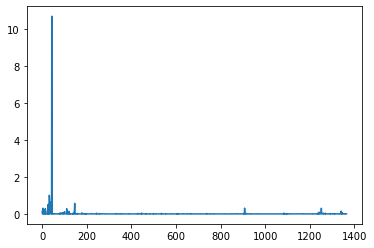

In [26]:
plt.plot(log_returns[:,3])